<h1>Chapter 3 | Case Study D1| <b>Distributions of Body Height and Income</b></h1>
<p>In this notebook, I'll be taking notes of the author's code on the referred case study. The goal is to review different types of distributions and how to visualize them. We'll review the concept of <b>normal</b> and <b>lognormal</b> distribution, and apply them using the <code>height-income-distributions</code>.</p>
<h2><b>PART A</b> | Read the data</h2>

In [1]:
import os
import sys
import warnings
import pandas as pd
import numpy as np
from mizani.formatters import percent_format
from plotnine import *
from scipy.stats import norm

warnings.filterwarnings("ignore")


In [2]:
pd.set_option("display.max_rows", 500)

In [3]:

# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

#  Get location folders
data_in = f"{dirname}da_data_repo/height-income-distributions/clean/"
data_out = f"{dirname}da_case_studies/ch03-distributions_height_income/"
output = f"{dirname}da_case_studies/ch03-distributions_height_income/output/"
func = f"{dirname}da_case_studies/ch00-tech_prep/"
sys.path.append(func)

In [4]:
# Import the prewritten helper functions
from py_helper_functions import *

<h3>1. Load clean and tidy data + create workfile</h3>

In [5]:
hrs = pd.read_csv(data_in + "hrs_height_income.csv")

In [6]:
hrs.head()

hhidpn  age  height   hhincome  female
0      3020   75  1.6256  703.50000       1
1  10001010   74  1.8034   12.00000       0
2  10003030   58  1.5494   11.88012       1
3  10004040   68   1.651   19.20000       1
4  10013010   76  1.7272   15.27600       0

In [7]:
hrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18747 entries, 0 to 18746
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hhidpn    18747 non-null  int64  
 1   age       18747 non-null  int64  
 2   height    18747 non-null  object 
 3   hhincome  18747 non-null  float64
 4   female    18747 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 732.4+ KB


<p><b>Problem:</b> <code>"height"</code> is stored as object (string). Let's convert it to numeric.</p>

In [8]:
hrs["height"] = hrs["height"].apply(pd.to_numeric, errors="coerce")

In [9]:
hrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18747 entries, 0 to 18746
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hhidpn    18747 non-null  int64  
 1   age       18747 non-null  int64  
 2   height    18660 non-null  float64
 3   hhincome  18747 non-null  float64
 4   female    18747 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 732.4 KB


<p>To reproduce the book's data, we need to filter some observations out of the dataset. The goal is to keep the data on American women aged 55-59.</p>

In [13]:
filtered_women = hrs.loc[
    lambda x: (x["age"] >= 55) &
    (x["age"] < 60) &
    (x["female"] == 1) &
    (x["height"] > 1.3) &
    (x["height"] < 2.1)
]

In [15]:
hrs["height"].describe()

count    18660.000000
mean         1.677539
std          0.104078
min          1.003300
25%          1.600200
50%          1.676400
75%          1.752600
max          2.324100
Name: height, dtype: float64

In [16]:
filtered_women["height"].describe()

count    1988.000000
mean        1.628820
std         0.070975
min         1.346200
25%         1.574800
50%         1.625600
75%         1.676400
max         1.905000
Name: height, dtype: float64

In [19]:
filtered_women["height"].mode()

0    1.6256
Name: height, dtype: float64

<p>We can see that we removed values above and below our threshold measures. The sample is around 10 percent of the original dataset. Moreover, we can notice the difference in the statistics. The mean height for our sample is lower, as well as the standard deviation. This means that our values are closer to a normal distribution. If we consider the mode, we can see that the mean, the median, and the mode are very close, a central feature in a normal distribution dataset.</p>
<p>We can plot the height graph now.</p>

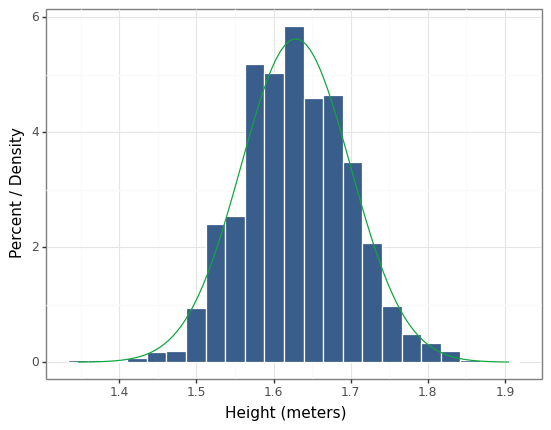

<ggplot: (101301853779)>

In [20]:
ggplot(filtered_women, aes(x="height")) + geom_histogram(
    aes(y="stat(density)"),
    bins=23,
    fill=color[0],
    color="white",
    alpha=0.8,
    center=1.55,
    closed="right",
) + stat_function(
    fun=norm.pdf,
    colour=color[1],
    args=[np.mean(filtered_women["height"]), np.std(filtered_women["height"])],
) + theme_bw() + ylab(
    "Percent / Density"
) + xlab(
    "Height (meters)"
)

<p>We can now compare this normally-distributed histogram with one variable that has a few large values: <b>household income</b>.  Let's filter the dataset, so that we get the faimily income of women of age 55-59. We also need to keep out income levels below 1 thousand or above 1 million dollars.</p>

In [21]:
filtered_women_income = hrs.loc[
    lambda x: (x["age"] >= 55) &
    (x["age"] < 60) &
    (x["female"] == 1) &
    (x["hhincome"] > 1) &
    (x["hhincome"] < 1000)
]

In [22]:
hrs["hhincome"].describe()

count    18747.000000
mean        69.362753
std        146.275580
min          0.000000
25%         19.056000
50%         40.212000
75%         80.903535
max      11204.572060
Name: hhincome, dtype: float64

In [23]:
filtered_women_income["hhincome"].describe()

count    1918.000000
mean       74.931920
std        87.185212
min         1.200000
25%        19.704000
50%        48.000000
75%       100.800000
max       945.000000
Name: hhincome, dtype: float64

In [24]:
filtered_women_income["hhincome"].mode()

0    25.0
Name: hhincome, dtype: float64

<p>Even after filtering the dataset, we can observe a difference in its distribution when compared to height. We can see how the median, the mode, and the mean are not the same (48, 25, and 74 USD thousand, respectively). This variable presents a few large values. Let's see its distribution in a histogram.</p>

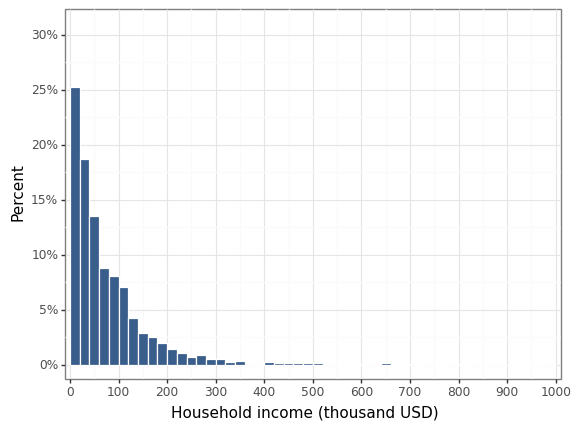

<ggplot: (101304240849)>

In [29]:
ggplot(filtered_women_income, aes(x="hhincome")) + geom_histogram(
    aes(y="stat(count)/sum(stat(count))"),
    binwidth=20,
    boundary=0,
    fill=color[0],
    color="white",
    alpha=0.8, closed="left"
) + ylab("Percent") + xlab("Household income (thousand USD)") + expand_limits(
    x=0.01, y=0.01
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 1001), breaks=seq(0, 1001, by=100)
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(0, 0.31), breaks=seq(0, 0.31, by=0.05), labels=percent_format()
) + theme_bw()

<p>We can see how asymmetric this distribution is. We are dealing with a <b>lognormal distribution</b>. It has a long right tail and includes many extreme values. This is an expected behavior from our variable - income distributions tend to be lognormally distributed. If we get the log of this distribution and overlay it will the density plot of the normal distribution with the same mean and standard deviation, we will get a more normal distribution.</p>

In [30]:
# get the natural log of household income
filtered_women_income["lnincome"] = np.log(filtered_women_income["hhincome"])
filtered_women_income["lnincome"].describe()

count    1918.000000
mean        3.761960
std         1.132004
min         0.182322
25%         2.980822
50%         3.871201
75%         4.613138
max         6.851185
Name: lnincome, dtype: float64

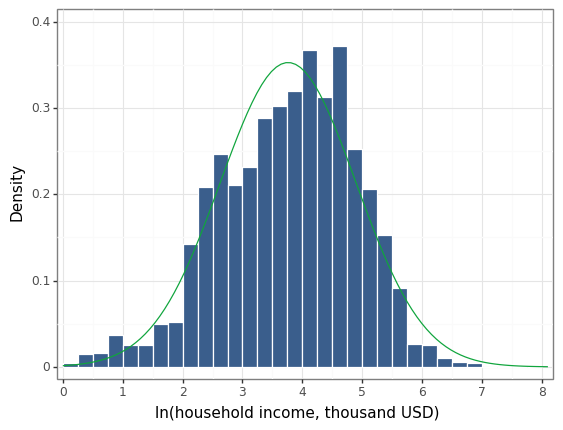

<ggplot: (101305982244)>

In [34]:
ggplot(filtered_women_income, aes(x="lnincome")) + geom_histogram(
    aes(y="stat(density)"),
    binwidth=0.25,
    fill=color[0],
    color="white",
    boundary=4,
    closed="right",
) + stat_function(
    fun=norm.pdf,
    colour=color[1],
    args=[
        np.mean(filtered_women_income["lnincome"]),
        np.std(filtered_women_income["lnincome"]),
    ],
) + expand_limits(
    x=0.01, y=0.01
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 8.1), breaks=seq(0, 8.1, by=1)
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(0, 0.4), breaks=seq(0, 0.41, by=0.1)
) + ylab(
    "Density"
) + xlab(
    "ln(household income, thousand USD)"
) + theme_bw()

<p>And the result is a normalized distribution! Be aware that:</p>
<ul>
<li><p>While taking the natural logarithm of a lognormally distributed variable can help approximate it to a normal distribution, it is important to note that it is still an <b>approximation</b>. The resulting distribution may not perfectly match a normal distribution, especially if the original data has a significantly skewed or heavy-tailed distribution.</p></li>

<li>In lognormal distributions, the <b>mean</b> and <b>standard deviation</b> are related to the underlying parameters of the distribution, namely the <b>mu</b> (mean of the logarithm of the data) and sigma (standard deviation of the logarithm of the data). After taking the logarithm, the resulting distribution will have a mean that corresponds to mu and a standard deviation that corresponds to sigma.</li>

<li>However, the mean and standard deviation of the original untransformed data will not necessarily match the mean and standard deviation of the transformed data. The logarithmic transformation can affect the relationship between the mean and standard deviation, and the resulting transformed data may exhibit different characteristics.</li>

<li>Therefore, it's important to keep in mind that while the natural logarithm can be used to approximate a lognormal distribution to a normal distribution, there may still be differences in the mean and standard deviation between the original data and the transformed data. The approximation relies on certain assumptions and may not be suitable for all cases or analyses.</li>
</ul>
<hr>